In [108]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [109]:
os.chdir('E:/documents')
os.getcwd()

'E:\\documents'

In [110]:
df=pd.read_csv('bikes.csv')

In [111]:
copy=df.copy()

In [112]:
df.shape

(731, 16)

In [113]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [114]:
# check the datatypes
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [115]:
# check the no. of unique values in each variable 
for i in df.columns:
    print('no of unique values in {} : {}'.format(i,df[i].nunique()))

no of unique values in instant : 731
no of unique values in dteday : 731
no of unique values in season : 4
no of unique values in yr : 2
no of unique values in mnth : 12
no of unique values in holiday : 2
no of unique values in weekday : 7
no of unique values in workingday : 2
no of unique values in weathersit : 3
no of unique values in temp : 499
no of unique values in atemp : 690
no of unique values in hum : 595
no of unique values in windspeed : 650
no of unique values in casual : 606
no of unique values in registered : 679
no of unique values in cnt : 696


we have to convert the datatypes of season, yr, mnth, holiday, weekday, workingday and weathersit 

In [116]:
# first change the data types of variables into proper type
col=['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in col:
    df[i]=df[i].astype('object')

In [117]:
df['dteday']=pd.to_datetime(df['dteday'])

In [118]:
def get_date(dt):
    return dt.day

In [119]:
df['date']=df['dteday'].map(get_date)

In [120]:
df.dtypes
# we can see that the datatypes are changed to proper ones

instant                int64
dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
holiday               object
weekday               object
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
date                   int64
dtype: object

In [121]:
# check for duplicate elements to avoid data leakege
df.duplicated().sum()

0

we can see that there is no duplicate elements in the dataset

In [122]:
# missing value analysis
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
date          0
dtype: int64

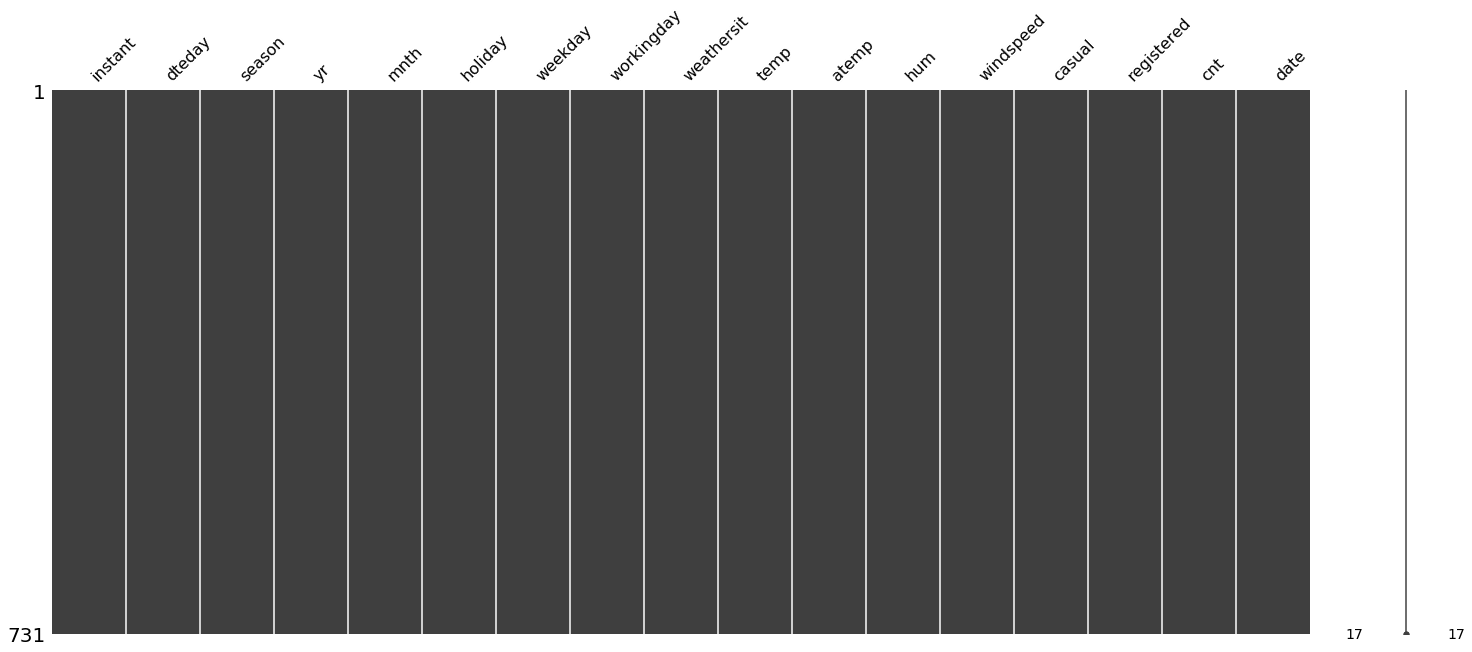

In [123]:
# visualize the missing values in the dataset
import missingno
missingno.matrix(df)

There is no missing values in the dataset

In [124]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


we know that the causal,registered and cnt are the dependent variables and also cnt is the sum of casual and registered variables so we can drop the casual and registered variables

In [125]:
df=df.drop(['casual','registered'],axis=1)

In [126]:
df.shape

(731, 15)

# Exploratory data analysis

In [127]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
holiday               object
weekday               object
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
date                   int64
dtype: object

In [128]:
df.shape

(731, 15)

In [129]:
# seperate the numerical and categorical variables
df_num=df.select_dtypes(exclude=['object','datetime64'])
df_num_col=df_num.columns

In [130]:
df_num.shape

(731, 7)

In [131]:
df_cat=df.select_dtypes(include='object')
df_cat_col=df_cat.columns

In [132]:
df_cat.shape

(731, 7)

In [133]:
df_num_col

Index(['instant', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'date'], dtype='object')

In [134]:
df_col=['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Univariate analysis

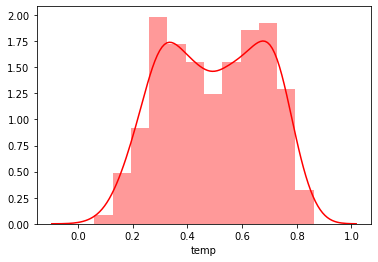

In [135]:
sns.distplot(df['temp'],kde=True,color='red')

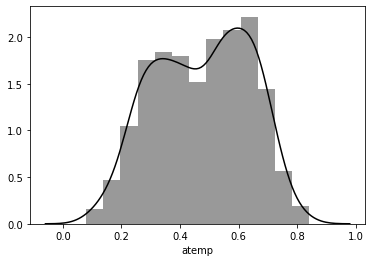

In [136]:
sns.distplot(df['atemp'],kde=True,color='black')

we can observe that the temp and atemp distributions are almost same 

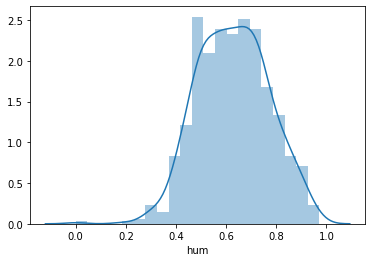

In [137]:
sns.distplot(df['hum'],kde=True)

It resembles the normal distribution with almost neglegeble outliers

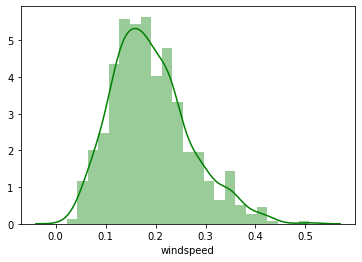

In [138]:
sns.distplot(df['windspeed'],kde=True,color='green')

windspeed also resembles the normal distribution with some outliers 

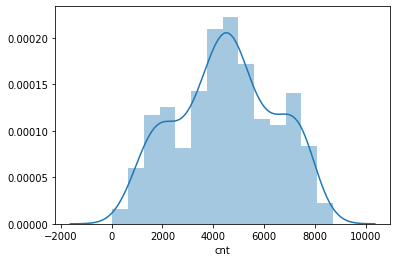

In [139]:
sns.distplot(df['cnt'],kde=True)

Dependent variable should follow normal distribution and it almost resembles the normal distribution

# Bivariate analysis

In [140]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'date'],
      dtype='object')

Dealing with categorical variables

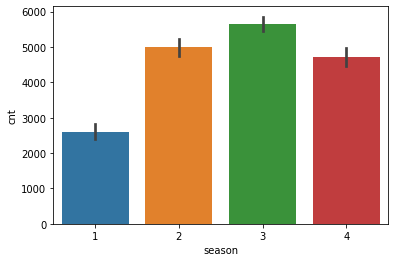

In [141]:
graph=sns.barplot(x='season',y='cnt',data=df)

we can observe the interesting pattern. There is a high demand in fall and low demand in spring

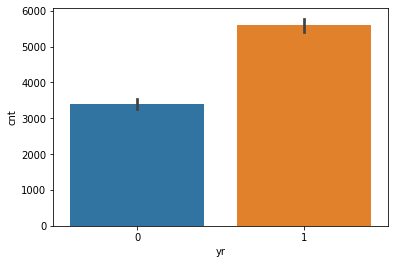

In [142]:
sns.barplot(x='yr',y='cnt',data=df)

Year does have an effect on demand but we have only two years data. we don't know what will happen in the next year so better to drop this variable in order to avoid confusion to the algorithm

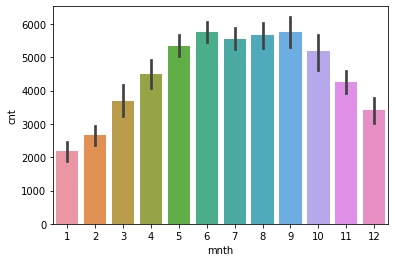

In [143]:
sns.barplot(x='mnth',y='cnt',data=df)

Month does have an effect on demand. We can observe that the demand for bikes is comparatively low from December to April

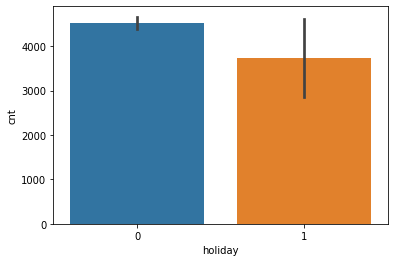

In [144]:
sns.barplot(x='holiday',y='cnt',data=df)

we can observe the interesting pattern here. Demand is higher in the working days because most of the working people are using the bikes to reach the office

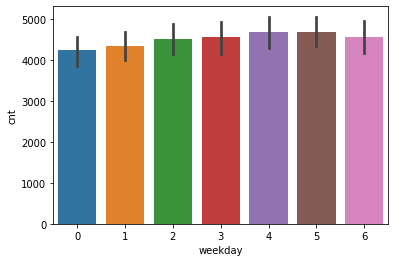

In [145]:
sns.barplot(x='weekday',y='cnt',data=df)

Weekday does not have any effect on demand. Its almost same in all the days. so it's better to drop this variable

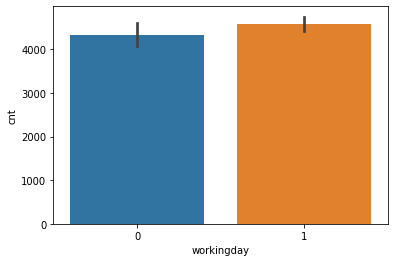

In [146]:
sns.barplot(x='workingday',y='cnt',data=df)

we have observed the same type of result in holiday variable. It might create multicollinearity problem. so it's better to drop one of the variable to avoid redundant variables in the dataset. 

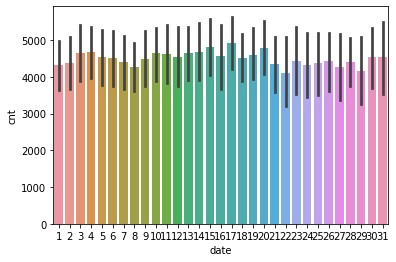

In [147]:
sns.barplot(x='date',y='cnt',data=df)

date doesn't have any effect on demand variable. so it's better to drop that date variable also.

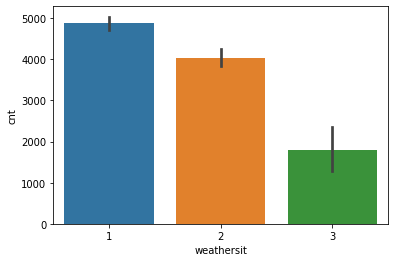

In [148]:
sns.barplot(x='weathersit',y='cnt',data=df)

Demand is much dependent on weathersit. clearly the demand is low when the climate is cool with rain and thunderstorm and higher when the weather is clear.

In [149]:
df_num.columns

Index(['instant', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'date'], dtype='object')

Dealing with numerical variables

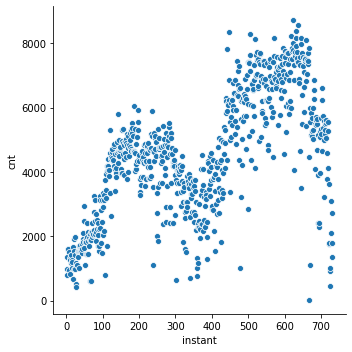

In [150]:
sns.relplot(x='instant',y='cnt',data=df)

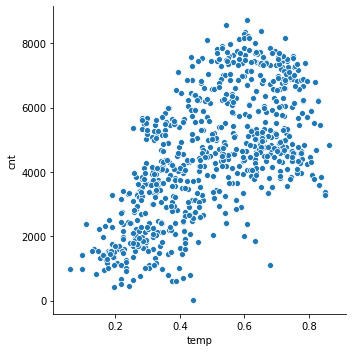

In [151]:
sns.relplot(x='temp',y='cnt',data=df)

Temp has an effect on demand. As temp increases demand also increases.

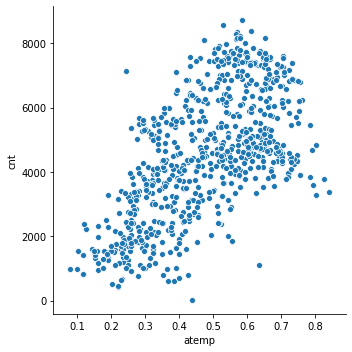

In [152]:
sns.relplot(x='atemp',y='cnt',data=df)

we can observe that the atemp pattern is same as temp pattern. It's better to check the correlation between these variable and decide whether to remove that variable or not. 

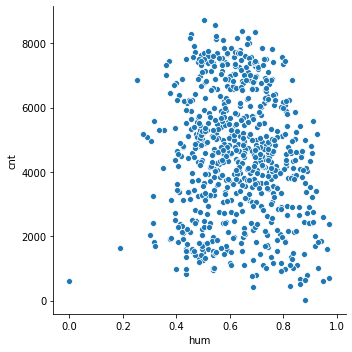

In [153]:
sns.relplot(x='hum',y='cnt',data=df)

We can't come to the conclusion by only seeing this graph. so we have check for correlation  

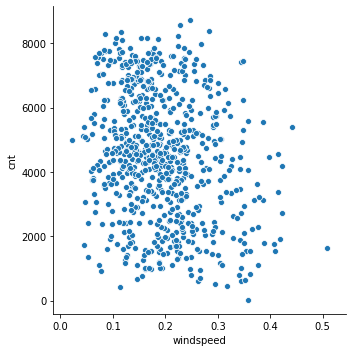

In [154]:
sns.relplot(x='windspeed',y='cnt',data=df)

we can observe that the demand is decreasing when the windspeed increases

In [155]:
# drop the variables which are not useful in predicting the target variable.
col_drop=['yr','date','instant','dteday']
df=df.drop(col_drop,axis=1)

In [156]:
df.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


# Check for correlation 

In [157]:
corr=df[['temp','atemp','hum','windspeed','cnt']].corr()

In [158]:
corr

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000


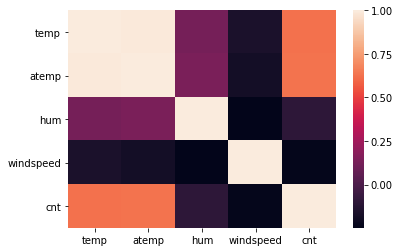

In [159]:
sns.heatmap(corr)

we should remove atemp variable because it is highly correlated with the temp variable. If we include this variable in the dataset we should face a multicollinearity problem.

In [160]:
df=df.drop('atemp',axis=1)

In [161]:
df.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.436957,0.186900,1600


# chisquare test for categorical features

In [162]:
col = ['season','mnth','holiday','workingday']

In [163]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [164]:
from scipy.stats import chi2_contingency

In [165]:
for i in col:
    for j in col:
        if(i==j):
            continue
        else:
            chi2,p,dof,ex=chi2_contingency(pd.crosstab(df[i],df[j]))
            print('p value between {} and {} is {}'.format(i,j,p))

p value between season and mnth is 0.0
p value between season and holiday is 0.6831687073042003
p value between season and workingday is 0.8865568364019545
p value between mnth and season is 0.0
p value between mnth and holiday is 0.5593083086035064
p value between mnth and workingday is 0.9933495217919545
p value between holiday and season is 0.6831687073042005
p value between holiday and mnth is 0.5593083086035064
p value between holiday and workingday is 4.033370935452143e-11
p value between workingday and season is 0.8865568364019545
p value between workingday and mnth is 0.9933495217919545
p value between workingday and holiday is 4.033370935452143e-11


Null hypothesis(ho):Two variables are independent  
Alternate hypothesis(h1): Two variables are not independent   
If p<0.05 we will reject the Null hypothesis saying that two variables are dependent on each other.
We can see that the dependency between holiday and the workingday is high. so it's better to drop one variable

In [166]:
df.drop('workingday',axis=1,inplace=True)

# Deal with outliers

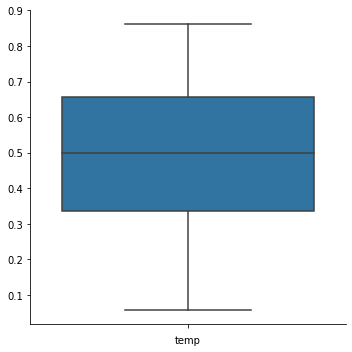

In [167]:
sns.catplot(x='temp',data=df,kind='box',orient='v')

There are no outliers in the temp variable

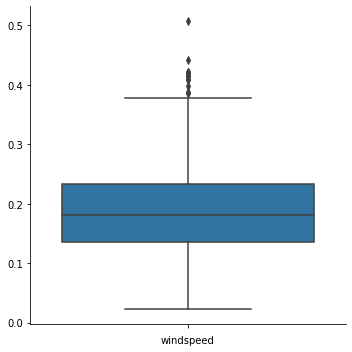

In [168]:
sns.catplot(x='windspeed',data=df,orient='v',kind='box')

In [169]:
#Function to remove outliers
def outliers(variable):
    low=0.01
    high=0.99
    new=df.quantile([low,high])
    l=new[variable][low]
    print('low-{}'.format(l))
    h=new[variable][high]
    print('high-{}'.format(h))
    lc=len(df[df[variable]<=l])
    hc=len(df[df[variable]>=h])
    t=len(df)
    print('percentage of outliers-{}'.format(((lc+hc)/t)*100))
    #assigning the higher and the lower values in the place of outliers
    df.loc[df[variable]<l,variable]=l
    df.loc[df[variable]>h,variable]=h

In [170]:
outliers('windspeed')

low-0.05297346000000001
high-0.4086522000000001
percentage of outliers-2.188782489740082


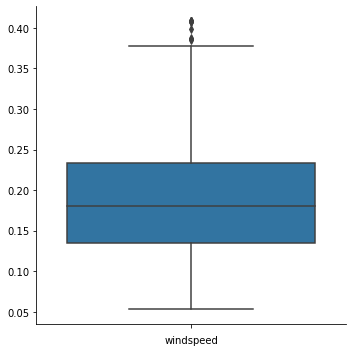

In [171]:
sns.catplot(x='windspeed',data=df,orient='v',kind='box')

we can see that the outliers are removed to some extent

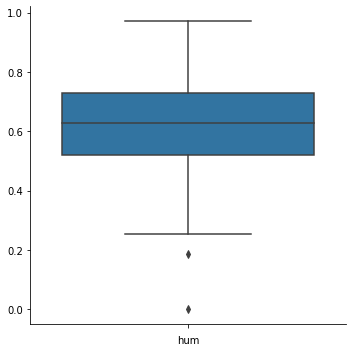

In [172]:
sns.catplot(x='hum',data=df,orient='v',kind='box')

In [173]:
df.loc[df['hum']<0.22,'hum']=0.22

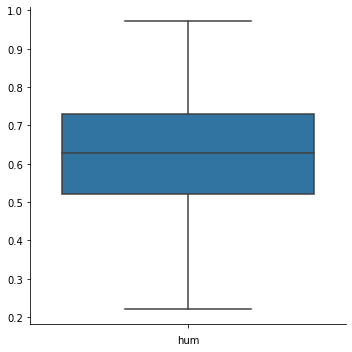

In [174]:
sns.catplot(x='hum',data=df,kind='box',orient='v')

we can see that the outliers are removed 

# normality check for the target variable

''

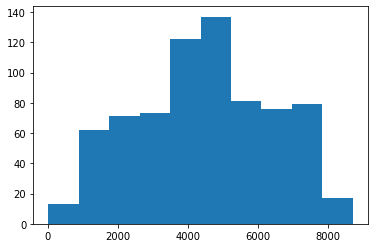

In [175]:
# check for the normality of target variable
plt.hist(df['cnt'])
;

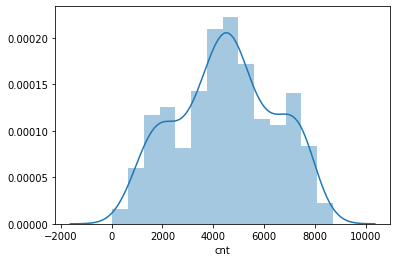

In [176]:
sns.distplot(df['cnt'])

Target variable resembles the normal distribution so we don't have to change the target data

# Autocorrelation in the target variable

In [177]:
# check for autocorrelation in target variable because it is a time series data
# first convert the cnt variable into float 
df1=pd.to_numeric(df['cnt'],downcast='float')

''

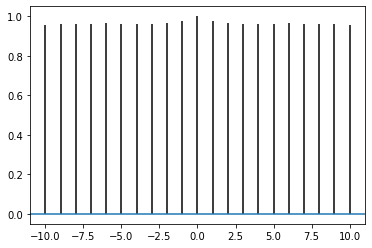

In [178]:
# plot the autocorrelation plot
plt.acorr(df1,maxlags=10)
;

we can see that there is a high autocorrelation in the target variable 

In [179]:
time_1=df['cnt'].shift(+1).to_frame()

In [180]:
time_2=df['cnt'].shift(+2).to_frame()

In [181]:
time_3=df['cnt'].shift(+3).to_frame()

In [182]:
time_4=df['cnt'].shift(+4).to_frame()

In [183]:
time_con=pd.concat([time_1,time_2,time_3,df['cnt']],axis=1)

In [184]:
time_con.columns=['time_1','time_2','time_3','cnt']

In [185]:
time_con.corr()

,time_1,time_2,time_3,cnt
time_1,1.000000,0.848454,0.784448,0.848588
time_2,0.848454,1.000000,0.848005,0.784623
time_3,0.784448,0.848005,1.000000,0.753541
cnt,0.848588,0.784623,0.753541,1.000000


We can see that there is a high correlation with the past values. So we can use these values as the independent variabels to predict the target variable.

In [186]:
df.drop('cnt',axis=1,inplace=True)

In [187]:
final_df=pd.concat([df,time_con],axis=1)

In [188]:
final_df.head()

,season,mnth,holiday,weekday,weathersit,temp,hum,windspeed,time_1,time_2,time_3,cnt
0,1,1,0,6,2,0.344167,0.805833,0.160446,NaN,NaN,NaN,985
1,1,1,0,0,2,0.363478,0.696087,0.248539,985.0,NaN,NaN,801
2,1,1,0,1,1,0.196364,0.437273,0.248309,801.0,985.0,NaN,1349
3,1,1,0,2,1,0.200000,0.590435,0.160296,1349.0,801.0,985.0,1562
4,1,1,0,3,1,0.226957,0.436957,0.186900,1562.0,1349.0,801.0,1600


In [189]:
final_df.dropna(inplace=True)

# one hot encoding 

In [190]:
final_df.head()

,season,mnth,holiday,weekday,weathersit,temp,hum,windspeed,time_1,time_2,time_3,cnt
3,1,1,0,2,1,0.200000,0.590435,0.160296,1349.0,801.0,985.0,1562
4,1,1,0,3,1,0.226957,0.436957,0.186900,1562.0,1349.0,801.0,1600
5,1,1,0,4,1,0.204348,0.518261,0.089565,1600.0,1562.0,1349.0,1606
6,1,1,0,5,2,0.196522,0.498696,0.168726,1606.0,1600.0,1562.0,1510
7,1,1,0,6,2,0.165000,0.535833,0.266804,1510.0,1606.0,1600.0,959


In [191]:
final_df.dtypes
# dummies will create only when the variable is object type

season         object
mnth           object
holiday        object
weekday        object
weathersit     object
temp          float64
hum           float64
windspeed     float64
time_1        float64
time_2        float64
time_3        float64
cnt             int64
dtype: object

In [192]:
final_df=pd.get_dummies(final_df,drop_first=True)

In [193]:
final_df.head()

,temp,hum,windspeed,time_1,time_2,time_3,cnt,season_2,season_3,season_4,...,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
3,0.200000,0.590435,0.160296,1349.0,801.0,985.0,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.226957,0.436957,0.186900,1562.0,1349.0,801.0,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0.204348,0.518261,0.089565,1600.0,1562.0,1349.0,1606,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0.196522,0.498696,0.168726,1606.0,1600.0,1562.0,1510,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,0.165000,0.535833,0.266804,1510.0,1606.0,1600.0,959,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [194]:
final_df.shape

(728, 30)

# Standardize the data

In [195]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
norm=scaler.fit_transform(final_df)

In [196]:
norm=pd.DataFrame(norm)

In [197]:
norm.columns=final_df.columns

In [198]:
norm.head()

,temp,hum,windspeed,time_1,time_2,time_3,cnt,season_2,season_3,season_4,...,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0.175530,0.492272,0.301740,0.152669,0.089623,0.110792,0.177174,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.209120,0.288315,0.376538,0.177174,0.152669,0.089623,0.181546,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.180948,0.396360,0.102879,0.181546,0.177174,0.152669,0.182237,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.171197,0.370360,0.325441,0.182237,0.181546,0.177174,0.171192,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.131919,0.419712,0.601190,0.171192,0.182237,0.181546,0.107800,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [199]:
# split the independent and dependent variables
x=norm.drop('cnt',axis=1)
y=norm['cnt']

In [200]:
# spliting the data into train and test
# since it is a time series data we have to split differently 
train_size=0.7*len(final_df)
train_size=int(train_size)

x_train=x.iloc[0:train_size,:]
x_test=x.iloc[train_size:,:]

y_train=y.iloc[0:train_size,]
y_test=y.iloc[train_size:,]

In [201]:
x_train.head()

,temp,hum,windspeed,time_1,time_2,time_3,season_2,season_3,season_4,mnth_2,...,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0.175530,0.492272,0.301740,0.152669,0.089623,0.110792,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.209120,0.288315,0.376538,0.177174,0.152669,0.089623,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.180948,0.396360,0.102879,0.181546,0.177174,0.152669,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.171197,0.370360,0.325441,0.182237,0.181546,0.177174,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.131919,0.419712,0.601190,0.171192,0.182237,0.181546,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [202]:
x_test.head()

,temp,hum,windspeed,time_1,time_2,time_3,season_2,season_3,season_4,mnth_2,...,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
509,0.786094,0.633997,0.456023,0.749425,0.772204,0.776346,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510,0.814131,0.606312,0.403588,0.755752,0.749425,0.772204,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
511,0.826591,0.617386,0.681589,0.692706,0.755752,0.749425,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
512,0.744560,0.598007,0.228733,0.658191,0.692706,0.755752,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
513,0.773634,0.362680,0.400096,0.786125,0.658191,0.692706,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# appling the different algorithms

In [203]:
import statsmodels.api as sm

In [204]:
model=sm.OLS(y_train,x_train).fit()

In [205]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              558.3
Date:                Fri, 21 Feb 2020   Prob (F-statistic):                        0.00
Time:                        20:04:37   Log-Likelihood:                          562.01
No. Observations:                 509   AIC:                                     -1066.
Df Residuals:                     480   BIC:                                     -943.3
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
temp             0.3353      0.046      7.343      0.000       0.246       0.425
hum             -0.0393      0.023     -1.697      0.090      -0.085       0.006
windspeed       -0.0565      0.016     -3.423      0.001      -0.089      -0.024
time_1           0.3734      0.038      9.781      0.000       0.298       0.448
time_2           0.1534      0.041      3.731      0.000       0.073       0.234
time_3           0.2064      0.036      5.721      0.000       0.135       0.277
season_2         0.0131      0.021      0.635      0.526      -0.027       0.054
season_3         0.0402      0.030      1.340      0.181      -0.019       0.099
season_4         0.0575      0.027      2.123      0.034       0.004       0.111
mnth_2           0.0033      0.015      0.216      0.829      -0.026       0.033
mnth_3           0.0079      0.018      0.429      0.668      -0.028       0.044
mnth_4          -0.0069      0.028     -0.245      0.806      -0.063       0.049
mnth_5          -0.0460      0.031     -1.476      0.141      -0.107       0.015
mnth_6          -0.1236      0.036     -3.386      0.001      -0.195      -0.052
mnth_7          -0.1958      0.044     -4.401      0.000      -0.283      -0.108
mnth_8          -0.1589      0.043     -3.726      0.000      -0.243      -0.075
mnth_9          -0.0898      0.038     -2.392      0.017      -0.164      -0.016
mnth_10         -0.0708      0.035     -2.042      0.042      -0.139      -0.003
mnth_11         -0.0559      0.034     -1.655      0.099      -0.122       0.010
mnth_12         -0.0381      0.025     -1.497      0.135      -0.088       0.012
holiday_1       -0.0512      0.024     -2.138      0.033      -0.098      -0.004
weekday_1        0.0376      0.014      2.740      0.006       0.011       0.065
weekday_2        0.0606      0.013      4.596      0.000       0.035       0.087
weekday_3        0.0457      0.013      3.407      0.001       0.019       0.072
weekday_4        0.0648      0.013      4.920      0.000       0.039       0.091
weekday_5        0.0634      0.013      4.822      0.000       0.038       0.089
weekday_6        0.0542      0.013      4.140      0.000       0.028       0.080
weathersit_2    -0.0642      0.010     -6.549      0.000      -0.083      -0.045
weathersit_3    -0.2378      0.023    -10.225      0.000      -0.283      -0.192
==============================================================================
Omnibus:                       45.436   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.287
Skew:                          -0.404   Prob(JB):                     3.10e-29
Kurtosis:                       5.353   Cond. No.                         36

In [206]:
pre=model.predict(x_test)

In [207]:
from sklearn.metrics import mean_squared_error

In [208]:
np.sqrt(mean_squared_error(y_test,pre))

0.12840545310814055

In [209]:
from sklearn.metrics import mean_absolute_error

In [210]:
mean_absolute_error(y_test,pre)

0.10238510258859179